# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

In [3]:
## TEST
url = "http://api.openweathermap.org/data/2.5/weather"
city = "Parma" 
city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric" 
response = requests.get(city_url).json()
pprint(response)

{'base': 'stations',
 'clouds': {'all': 99},
 'cod': 200,
 'coord': {'lat': 44.8027, 'lon': 10.329},
 'dt': 1730912395,
 'id': 3171457,
 'main': {'feels_like': 9.23,
          'grnd_level': 1018,
          'humidity': 72,
          'pressure': 1029,
          'sea_level': 1029,
          'temp': 9.23,
          'temp_max': 9.23,
          'temp_min': 9.23},
 'name': 'Parma',
 'sys': {'country': 'IT',
         'id': 2006391,
         'sunrise': 1730873033,
         'sunset': 1730908847,
         'type': 2},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 125, 'gust': 0.77, 'speed': 0.55}}


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | fale old settlement
Processing Record 2 of Set 1 | iqaluit
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | hasaki
Processing Record 5 of Set 1 | angaur state
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | altai
Processing Record 8 of Set 1 | pathankot
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | blackmans bay
Processing Record 11 of Set 1 | cooma
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | alegrete
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | kroya
Processing Record 17 of Set 1 | yuzhno-kurilsk
Processing Record 18 of Set 1 | ulladulla
Processing Record 19 of Set 1 | ust-nera
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Set 1 | peniche
Processing Record 22 of Set 1 | necochea
Processing Record 23 of Set 1

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,fale old settlement,-9.3852,-171.2468,27.50,71,51,1.80,TK,1730912395
1,iqaluit,63.7506,-68.5145,-4.15,68,75,3.09,CA,1730912396
2,punta arenas,-53.1500,-70.9167,9.06,53,75,10.80,CL,1730912397
3,hasaki,35.7333,140.8333,15.71,62,61,3.78,JP,1730912398
4,angaur state,6.9060,134.1300,28.60,74,58,3.92,PW,1730912400


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fale old settlement,-9.3852,-171.2468,27.50,71,51,1.80,TK,1730912395
1,iqaluit,63.7506,-68.5145,-4.15,68,75,3.09,CA,1730912396
2,punta arenas,-53.1500,-70.9167,9.06,53,75,10.80,CL,1730912397
3,hasaki,35.7333,140.8333,15.71,62,61,3.78,JP,1730912398
4,angaur state,6.9060,134.1300,28.60,74,58,3.92,PW,1730912400


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

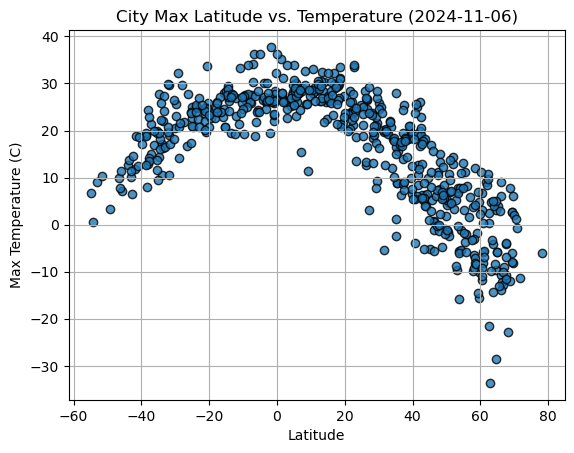

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
date_timestamp = city_data_df["Date"].iloc[0]
date = time.strftime('%Y-%m-%d', time.gmtime(date_timestamp))

plt.title(f"City Max Latitude vs. Temperature ({date})") 
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

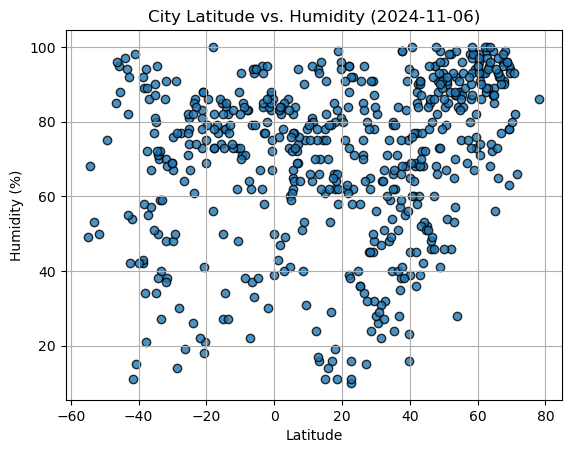

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
date_timestamp = city_data_df["Date"].iloc[0]
date = time.strftime('%Y-%m-%d', time.gmtime(date_timestamp))

plt.title(f"City Latitude vs. Humidity ({date})") 
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

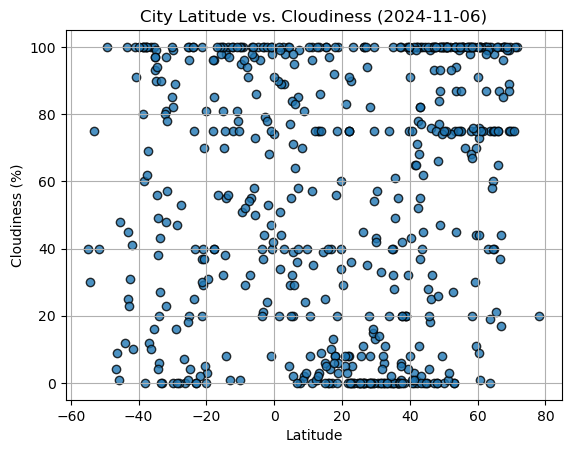

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
date_timestamp = city_data_df["Date"].iloc[0]
date = time.strftime('%Y-%m-%d', time.gmtime(date_timestamp))

plt.title(f"City Latitude vs. Cloudiness ({date})") 
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

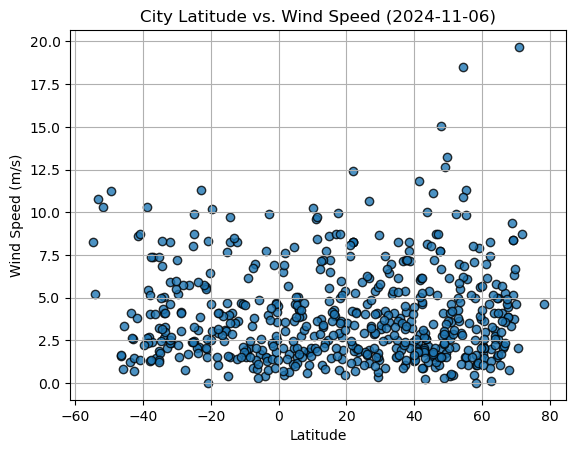

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
date_timestamp = city_data_df["Date"].iloc[0]
date = time.strftime('%Y-%m-%d', time.gmtime(date_timestamp))

plt.title(f"City Latitude vs. Wind Speed ({date})") 
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def plot_linear_regression(df, x_col, y_col, coord):
    slope, intercept, r_value, p_value, std_err = linregress(df[x_col], df[y_col])
    
    regress_values = df[x_col] * slope + intercept
    
    plt.scatter(df[x_col], df[y_col], linewidths=1, marker="o", alpha=0.8)
    plt.plot(df[x_col], regress_values, "r-", label=f'y = {slope:.2f}x + {intercept:.2f}')
    plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', coord, fontsize=15, color="red")

    x_label = 'Latitude' if x_col == 'Lat' else x_col.replace('_', ' ')
    
    plt.xlabel(x_label)
    plt.ylabel(y_col.replace('_', ' '))
    plt.title(f"{x_label} vs. {y_col.replace('_', ' ')}")

    print(f"The r^2-value is: {r_value**2}")

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,iqaluit,63.7506,-68.5145,-4.15,68,75,3.09,CA,1730912396
3,hasaki,35.7333,140.8333,15.71,62,61,3.78,JP,1730912398
4,angaur state,6.9060,134.1300,28.60,74,58,3.92,PW,1730912400
6,altai,46.3722,96.2583,0.69,48,76,1.50,MN,1730912402
7,pathankot,32.2833,75.6500,20.05,51,0,2.55,IN,1730912403


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fale old settlement,-9.3852,-171.2468,27.50,71,51,1.80,TK,1730912395
2,punta arenas,-53.1500,-70.9167,9.06,53,75,10.80,CL,1730912397
5,ushuaia,-54.8000,-68.3000,6.81,49,40,8.23,AR,1730912401
9,blackmans bay,-43.0167,147.3167,10.07,82,25,2.55,AU,1730912406
10,cooma,-36.2333,149.1333,16.94,67,100,1.45,AU,1730912407


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.7294067951552076


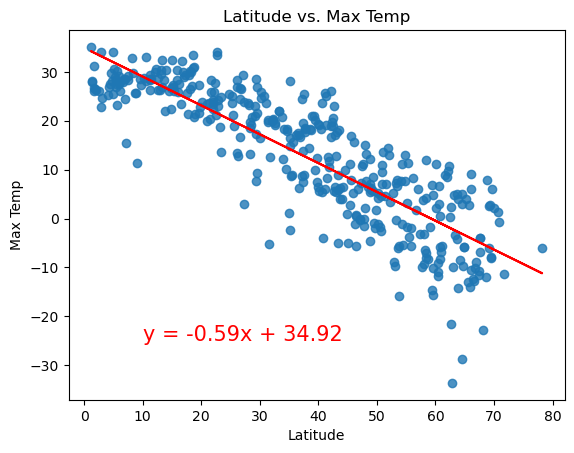

In [16]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df, "Lat", "Max Temp", (10, -25))

The r^2-value is: 0.5544303684068704


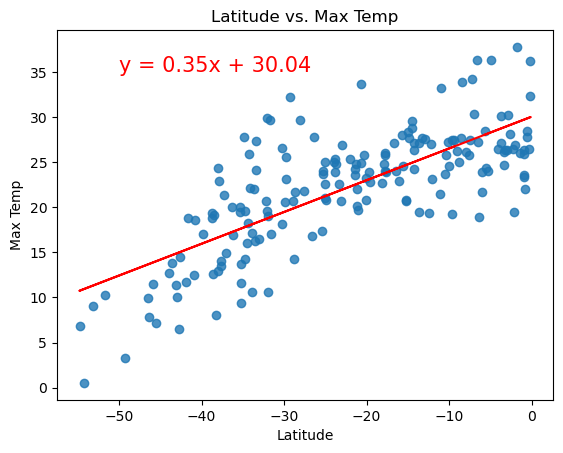

In [17]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df, "Lat", "Max Temp", (-50, 35))

**Discussion about the linear relationship:**

- Temperature vs. Latitude (Northern Hemisphere)

The relationship between latitude and maximum temperature in the Northern Hemisphere is inversely proportional, where an increase in latitude corresponds to a decrease in maximum temperature. This analysis indicates that areas farther from the equator tend to be cooler. We can conclude that regions closer to the North Pole have lower temperatures.

- Temperature vs. Latitude (Southern Hemisphere)

In the Southern Hemisphere, there is also an inverse relationship between latitude and maximum temperature. As latitude increases towards the South Pole, maximum temperatures decrease. This analysis shows that areas farther from the equator are cooler, confirming that regions closer to the South Pole have lower temperatures.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.13011980039257134


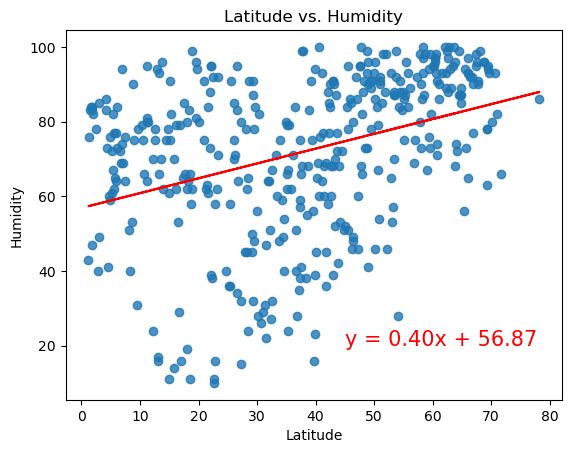

In [18]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df, "Lat", "Humidity", (45, 20))

The r^2-value is: 0.019833614316727442


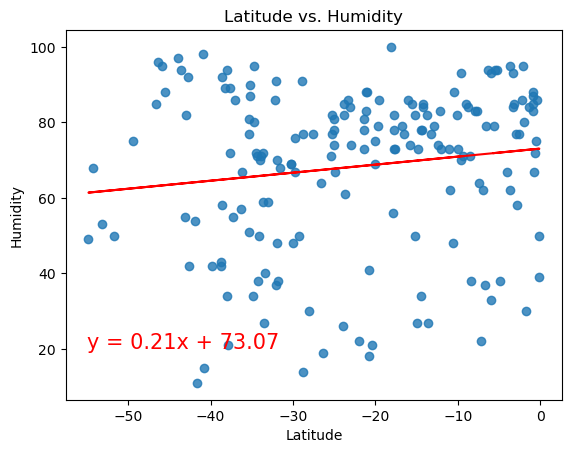

In [19]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df, "Lat", "Humidity", (-55, 20))

**Discussion about the linear relationship:**

- Humidity vs. Latitude (Northern Hemisphere)

There is a slight positive relationship between latitude and humidity in the Northern Hemisphere, although the correlation is not very strong. This analysis suggests that areas farther from the equator may experience higher humidity levels. We can conclude that humidity is likely influenced by specific climate patterns or the presence of water bodies.

- Humidity vs. Latitude (Southern Hemisphere)

The relationship between latitude and humidity in the Southern Hemisphere is similar to the Northern Hemisphere, with a slight positive correlation. This analysis indicates that areas farther from the equator might have higher humidity. We can conclude that climatic and geographical factors play a role in humidity levels.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.09752350859908662


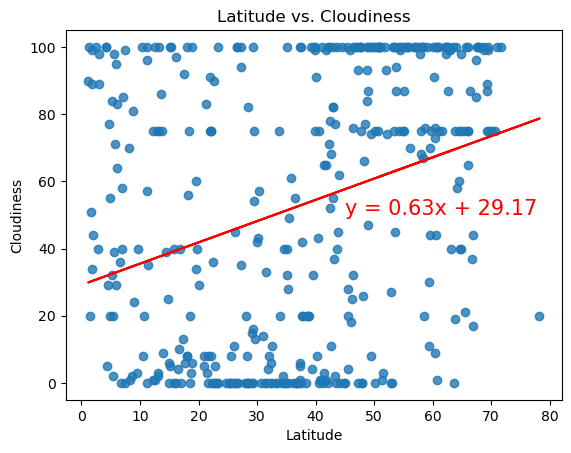

In [20]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df, "Lat", "Cloudiness", (45, 50))

The r^2-value is: 0.03203398386608131


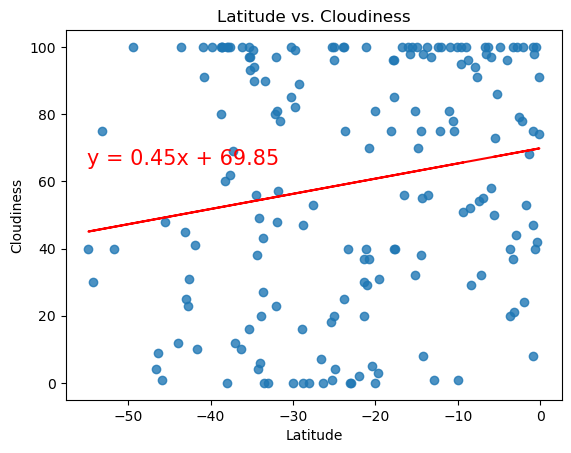

In [21]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df, "Lat", "Cloudiness", (-55, 65))

**Discussion about the linear relationship:**

- Cloudiness vs. Latitude (Northern Hemisphere)

The relationship between latitude and cloudiness in the Northern Hemisphere shows a weak correlation, suggesting that other factors might influence cloudiness more significantly. This analysis implies that cloudiness does not have a clear trend with latitude. We can conclude that cloudiness is influenced by specific regional climate patterns.

- Cloudiness vs. Latitude (Southern Hemisphere)

Similar to the Northern Hemisphere, the relationship between latitude and cloudiness in the Southern Hemisphere is weak. This analysis suggests that latitude is not a strong determinant of cloudiness levels. We can conclude that regional climate patterns likely have a more substantial impact on cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0038053524710164213


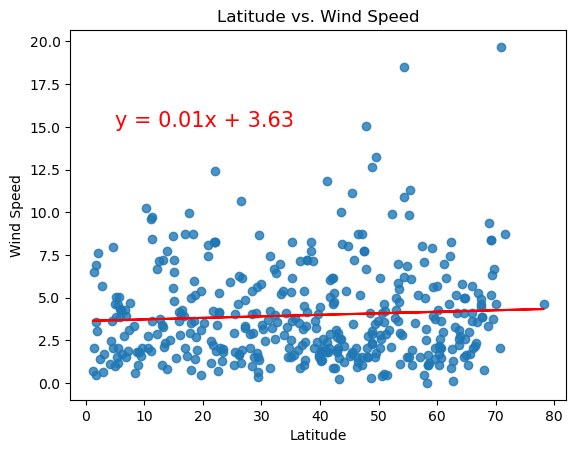

In [22]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df, "Lat", "Wind Speed", (5, 15))

The r^2-value is: 0.03553034584963981


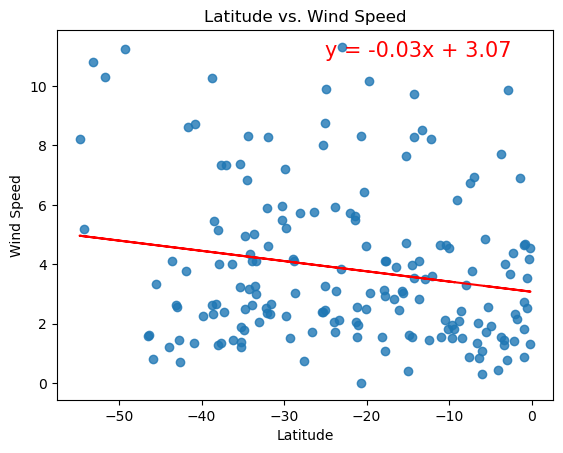

In [23]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df, "Lat", "Wind Speed", (-25, 11))

**Discussion about the linear relationship:** 

- Wind Speed vs. Latitude (Northern Hemisphere)

There is a slight positive relationship between latitude and wind speed in the Northern Hemisphere. This analysis shows that as latitude increases, wind speeds tend to increase slightly. We can conclude that areas farther from the equator might experience higher wind speeds due to specific climate patterns.

- Wind Speed vs. Latitude (Southern Hemisphere)

In the Southern Hemisphere, the relationship between latitude and wind speed is also slightly positive. This analysis indicates that higher latitudes correspond to higher wind speeds. We can conclude that wind speed is influenced by regional climatic conditions.